In [35]:
import pandas as pd

In [75]:
def monthly_payment(n_periods, period_interest_rate, present_value, future_value=0):
    """
    Calculate monthly payment using Present/Future Value formula.
    time_years : float
        Loan or investment duration in years.
    annual_interest_rate : float
        Annual interest rate in percentage (e.g., 6 for 6%).
    present_value : float
        Present value (loan amount or investment).
    future_value : float, optional
        Future value at the end of the period (default 0).
    Returns
    -------
    float
        Monthly payment.
    """
    # Convert annual rate to monthly decimal rate
    r = period_interest_rate
    n = n_periods

    if r == 0:
        # No interest case
        return (present_value + future_value) / n

    # Payment formula
    pmt = (r * (present_value + future_value / ((1 + r) ** n))) / (1 - (1 + r) ** -n)

    lifetime_pmt = n_periods*pmt
    lifetime_yield = (lifetime_pmt-present_value)/present_value
    
    # print(f'Lifetime Payment: {lifetime_pmt}'
    print(f'Period Payment: {round(pmt, 2)}')
    print(f'Total Periods: {n_periods}')
    print(f'Yearly Payment: {round(pmt*12, 2)}')
    print(f'Lifetime Payment if Paid every Month: {round(lifetime_pmt, 2)}')    
    print(f'Lifetime Yield: {round(lifetime_yield*100, 2)}%')

    return pmt#, lifetime_pmt, lifetime_yield





In [61]:
# If I have 500K and wish to buy a 400K home, how many months does it take to reach the 400K if I took out a 30 year loan and borrowed at 5%?

In [78]:

def generate_amortatized_loan(total_principal, n_periods, period_interest_rate,period_payment):
    df = pd.DataFrame(columns=['Period', 'Beginning_Principle', 'Payment', 'Interest_Rate'
                                                  , 'Paid_Interest', 'Paid_Principal'
                                                  , 'Ending_Principle','Paid_Total'])
    period_counter = 0
    ending_balance = total_principal
    total_paid = 0
    total_interest = 0
    
    for p in range(n_periods):
        period_counter += 1
        beginning_balance = ending_balance
        payment = period_payment
        interest = period_interest_rate
        paid_interest = beginning_balance*interest
        paid_principal = payment-paid_interest
        ending_balance = beginning_balance-paid_principal
        dic = {}
        dic['Beginning_Principle'] = [beginning_balance]
        dic['Period'] = [period_counter]
        dic['Payment'] = [payment]
        dic['Interest_Rate'] = [interest]
        dic['Paid_Interest'] = [paid_interest]
        dic['Paid_Principal'] = [paid_principal]
        dic['Ending_Principle'] = [ending_balance]
        df = pd.concat([df, pd.DataFrame(dic)])    
        # break
    return df

#### Generate Amortatized Loan

In [93]:
principal = 300000
n_periods = 5
period_interest_rate = 0.03/12
period_payment = monthly_payment(n_periods=n_periods, period_interest_rate=period_interest_rate, present_value=principal, future_value=0)
generate_amortatized_loan(principal, n_periods, period_interest_rate, period_payment)

Period Payment: 60450.75
Total Periods: 5
Yearly Payment: 725408.99
Lifetime Payment if Paid every Month: 302253.75
Lifetime Yield: 0.75%


/tmp/ipykernel_1157262/233019401.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(dic)])


,Period,Beginning_Principle,Payment,Interest_Rate,Paid_Interest,Paid_Principal,Ending_Principle,Paid_Total
0,1,300000,60450.749062,0.0025,750.000000,59700.749062,2.402993e+05,NaN
0,2,240299.250938,60450.749062,0.0025,600.748127,59850.000935,1.804493e+05,NaN
0,3,180449.250003,60450.749062,0.0025,451.123125,59999.625937,1.204496e+05,NaN
0,4,120449.624066,60450.749062,0.0025,301.124060,60149.625002,6.030000e+04,NaN
0,5,60299.999064,60450.749062,0.0025,150.749998,60299.999064,-5.980837e-09,NaN


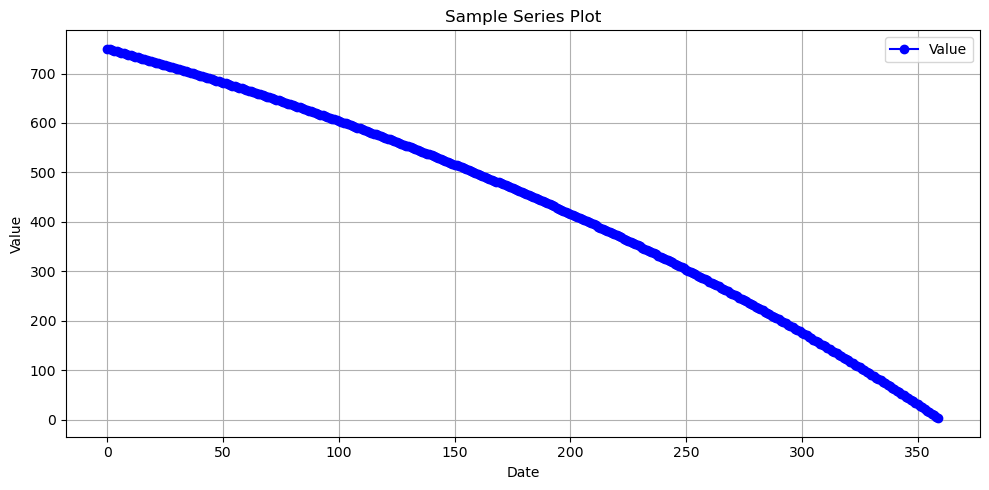

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample pandas Series
data = df['Paid_Interest'].reset_index(drop=True)
                 # index=pd.date_range("2025-01-01", periods=7))

# Plot the Series
plt.figure(figsize=(10, 5))
plt.plot(data, marker='o', linestyle='-', color='blue', label='Value')

# Add titles and labels
plt.title("Sample Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [91]:
df['Paid_Interest'].reset_index(drop=True)

0      750.000000
1      748.712500
2      747.421781
3      746.127836
4      744.830655
          ...    
355     15.424252
356     12.300313
357      9.168563
358      6.028985
359      2.881557
Name: Paid_Interest, Length: 360, dtype: float64

In [94]:
40000/2200000

0.01818181818181818